In [1791]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
pd.options.display.max_columns = 100
%matplotlib inline

In [1792]:
data = pd.read_csv('C:/Geekbrains/train.csv')

In [1793]:
data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [1794]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [1795]:
def remove_unnecessary_columns(df):
    # удаляем незначимые, на мой взгляд, признаки, т.к. их заполнение очень плохое, а заполнение по среднему не даст объективной картины 
    # Healthcare_1, LifeSquare, KitchenSquare
    df = df.drop('Healthcare_1', axis=1)
    df = df.drop('LifeSquare', axis=1)
    df = df.drop('KitchenSquare', axis=1)
    return df
data = remove_unnecessary_columns(data)

In [1796]:
# обработка нечисловых полей
data = pd.get_dummies(data)

In [1797]:
# анализ количества комнат
data['Rooms'].describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

In [1798]:
data.loc[data['Rooms'] > 6, :]

,Id,DistrictId,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
377,5927,57,10.0,59.056975,22,22.0,2002,0.090799,74,19083,2,5,15,317265.323792,0,1,0,1,0,1
1454,8491,1,19.0,42.006046,17,17.0,2014,0.007122,1,264,0,0,1,78364.616704,0,1,0,1,0,1
8849,14865,9,10.0,60.871266,3,2.0,1994,0.161532,25,5648,1,2,4,172329.270863,0,1,0,1,0,1


In [1799]:
data.loc[data['Rooms'] == 10, 'Rooms'] = 2
data.loc[data['Rooms'] == 19, 'Rooms'] = 1

In [1800]:
data.loc[data['Id'].isin([5927, 8491, 14865]), :]

,Id,DistrictId,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
377,5927,57,2.0,59.056975,22,22.0,2002,0.090799,74,19083,2,5,15,317265.323792,0,1,0,1,0,1
1454,8491,1,1.0,42.006046,17,17.0,2014,0.007122,1,264,0,0,1,78364.616704,0,1,0,1,0,1
8849,14865,9,2.0,60.871266,3,2.0,1994,0.161532,25,5648,1,2,4,172329.270863,0,1,0,1,0,1


In [1801]:
data.loc[data['Rooms'] == 0, :]

,Id,DistrictId,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
1397,12638,27,0.0,138.427694,4,3.0,2016,0.075424,11,3097,0,0,0,268394.744389,0,1,0,1,0,1
1981,7917,27,0.0,212.932361,2,3.0,2008,0.211401,9,1892,0,0,1,302211.260887,0,1,0,1,0,1
2269,7317,27,0.0,41.790881,13,0.0,1977,0.211401,9,1892,0,0,1,98129.976788,0,1,0,1,0,1
3911,770,28,0.0,49.483501,16,0.0,2015,0.118537,30,6207,1,1,0,217009.338463,0,1,0,1,0,1
4366,456,6,0.0,81.491446,4,0.0,1977,0.243205,5,1564,0,0,0,212864.799112,0,1,0,1,0,1
4853,3224,27,0.0,2.377248,1,0.0,1977,0.017647,2,469,0,0,0,126596.941798,0,1,0,1,0,1
6149,3159,88,0.0,38.697117,9,16.0,1982,0.127376,43,8429,3,3,9,158998.110646,0,1,0,1,0,1
8834,9443,27,0.0,87.762616,5,15.0,1977,0.211401,9,1892,0,0,1,219281.918007,0,1,0,1,0,1


In [1802]:
list_for_drop = [1397, 1981, 4366, 4853, 8834]
data = data.drop(data.index[list_for_drop])

In [1803]:
data.loc[data['Rooms'] == 0, :]

,Id,DistrictId,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
2269,7317,27,0.0,41.790881,13,0.0,1977,0.211401,9,1892,0,0,1,98129.976788,0,1,0,1,0,1
3911,770,28,0.0,49.483501,16,0.0,2015,0.118537,30,6207,1,1,0,217009.338463,0,1,0,1,0,1
6149,3159,88,0.0,38.697117,9,16.0,1982,0.127376,43,8429,3,3,9,158998.110646,0,1,0,1,0,1


In [1804]:
data['Rooms'].describe()

count    9995.000000
mean        1.888044
std         0.813000
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         6.000000
Name: Rooms, dtype: float64

In [1805]:
# анализ года постройки дома

In [1806]:
data['HouseYear'].describe()

count    9.995000e+03
mean     3.991166e+03
std      2.005504e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [1807]:
data.loc[data['HouseYear'] > 2019, :]

,Id,DistrictId,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
585,15051,53,2.0,59.597891,3,24.0,2020,0.049637,34,7759,0,1,3,243114.222804,0,1,0,1,0,1
707,4345,62,1.0,49.275155,5,1.0,2020,0.072158,2,629,1,0,0,135353.885620,0,1,0,1,1,0
790,6845,169,3.0,87.371123,4,24.0,2020,0.178917,18,3594,4,1,5,295304.011974,0,1,0,1,0,1
918,2530,53,2.0,64.233072,13,24.0,2020,0.049637,34,7759,0,1,3,283334.496716,0,1,0,1,0,1
1497,10814,109,1.0,37.265070,9,12.0,20052011,0.136330,30,6141,10,3,6,254084.534396,0,1,0,1,0,1
1499,6731,120,2.0,85.087643,7,10.0,2020,0.341072,27,5664,48,3,11,536020.260344,0,1,0,1,0,1
2493,3445,53,1.0,35.672788,4,24.0,2020,0.049637,34,7759,0,1,3,170847.416766,0,1,0,1,0,1
2877,8832,1,3.0,83.260743,15,21.0,2020,0.007122,1,264,0,0,1,242243.090839,0,1,0,1,0,1
3357,9600,62,1.0,55.911215,6,17.0,2020,0.072158,2,629,1,0,0,138770.715048,0,1,0,1,1,0
3485,7026,62,1.0,44.019287,7,12.0,2020,0.072158,2,629,1,0,0,135588.215289,0,1,0,1,1,0


In [1808]:
data.loc[data['HouseYear'] == 4968, 'HouseYear'] = 1968

In [1809]:
data.loc[data['HouseYear'] == 20052011, 'HouseYear'] = 2005

In [1810]:
# предпологаю, что это оставшиеся квартиры в строщихся домах

In [1811]:
# анализ общей площади

In [1812]:
data['Square'].describe()

count    9995.000000
mean       56.291622
std        20.978775
min         1.136859
25%        41.774312
50%        52.505780
75%        65.889901
max       641.065193
Name: Square, dtype: float64

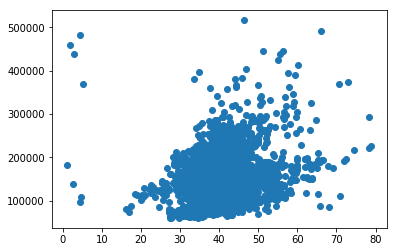

In [1813]:
data_r1_sq80 = data.loc[(data['Square'] < 80) & (data['Rooms'] == 1), :]
plt.scatter(data_r1_sq80['Square'], data_r1_sq80['Price']);

In [1814]:
# усредним строки с площадью меньшей 10 метров

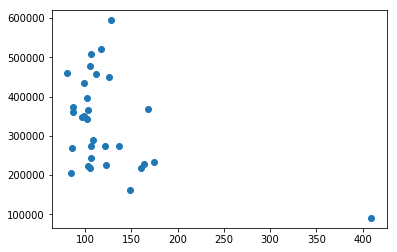

In [1815]:
data_r1_sq80 = data.loc[(data['Square'] >= 80) & (data['Rooms'] == 1), :]
plt.scatter(data_r1_sq80['Square'], data_r1_sq80['Price']);

In [1816]:
# усредним строки с площадью большей 100 метров

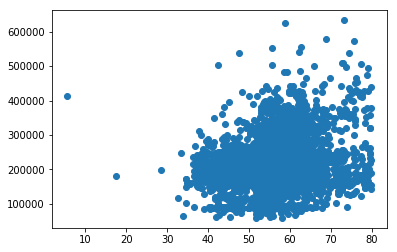

In [1817]:
data_r2_sq80 = data.loc[(data['Square'] < 80) & (data['Rooms'] == 2), :]
plt.scatter(data_r2_sq80['Square'], data_r2_sq80['Price']);

In [1818]:
# усредним строки с площадью меньшей 20 метров

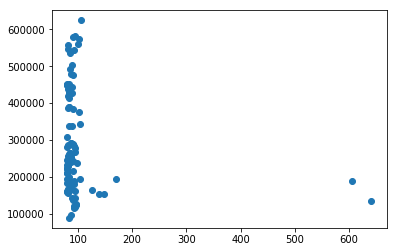

In [1819]:
data_r2_sq80 = data.loc[(data['Square'] >= 80) & (data['Rooms'] == 2), :]
plt.scatter(data_r2_sq80['Square'], data_r2_sq80['Price']);

In [1820]:
# усредним строки с площадью большей 120 метров

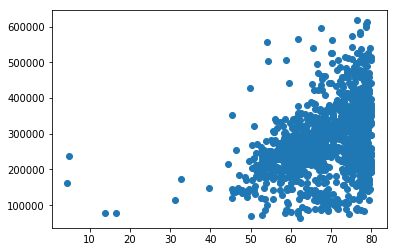

In [1821]:
data_r3_sq80 = data.loc[(data['Square'] < 80) & (data['Rooms'] == 3), :]
plt.scatter(data_r3_sq80['Square'], data_r3_sq80['Price']);

In [1822]:
# усредним строки с площадью меньшей 30 метров

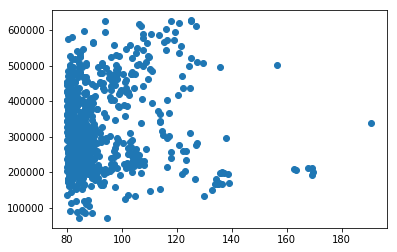

In [1823]:
data_r3_sq80 = data.loc[(data['Square'] >= 80) & (data['Rooms'] == 3), :]
plt.scatter(data_r3_sq80['Square'], data_r3_sq80['Price']);

In [1824]:
# усредним строки с площадью большей 180 метров

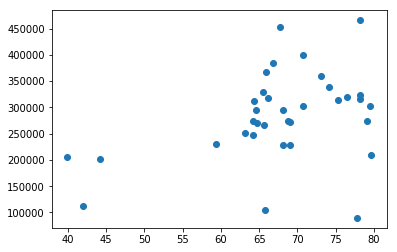

In [1825]:
data_r4_sq80 = data.loc[(data['Square'] < 80) & (data['Rooms'] > 3), :]
plt.scatter(data_r4_sq80['Square'], data_r4_sq80['Price']);

In [1826]:
# усредним строки с площадью меньшей 45 метров

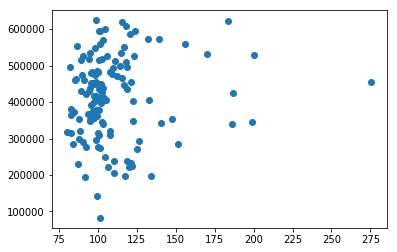

In [1827]:
data_r4_sq80 = data.loc[(data['Square'] >= 80) & (data['Rooms'] > 3), :]
plt.scatter(data_r4_sq80['Square'], data_r4_sq80['Price']);

In [1828]:
# усредним строку с площадью большей 250 метров

In [1829]:
train, valid = train_test_split(data, test_size=0.2, random_state=42)

In [1830]:
# средняя площадь в связке с районом и количеством комнат
mean_sq_d_r = train.groupby(['DistrictId', 'Rooms'], as_index=False)[['Square']].mean().rename(columns={'Square': 'mean_sq_d_r'})
# средняя площадь только в связке с количеством комнат
mean_sq_r = train.groupby(['Rooms'], as_index=False)[['Square']].mean().rename(columns={'Square': 'mean_sq_r'})
# средняя площадь
mean_sq_o = train['Square'].mean()

def add_mean_sq(df, stat1=mean_sq_d_r, stat2=mean_sq_r, mean_sq=mean_sq_o):
    df = pd.merge(df, stat1, on=['DistrictId', 'Rooms'], how='left')
    df = pd.merge(df, stat2, on=['Rooms'], how='left')
    df['mean_sq_r'] = df['mean_sq_r'].fillna(mean_sq)
    df['mean_sq_d_r'] = df['mean_sq_d_r'].fillna(df['mean_sq_r'])
    df.loc[(df['Square'] < 10)  & (df['Rooms'] == 1),   'Square'] = df['mean_sq_d_r']
    df.loc[(df['Square'] > 100) & (data['Rooms'] == 1), 'Square'] = df['mean_sq_d_r']
    df.loc[(df['Square'] < 20)  & (data['Rooms'] == 2), 'Square'] = df['mean_sq_d_r']
    df.loc[(df['Square'] > 120) & (data['Rooms'] == 2), 'Square'] = df['mean_sq_d_r']
    df.loc[(df['Square'] < 30)  & (data['Rooms'] == 3), 'Square'] = df['mean_sq_d_r']
    df.loc[(df['Square'] > 180) & (data['Rooms'] == 3), 'Square'] = df['mean_sq_d_r']
    df.loc[(df['Square'] < 45)  & (data['Rooms'] > 3),  'Square'] = df['mean_sq_d_r']
    df.loc[(df['Square'] > 250) & (data['Rooms'] > 3),  'Square'] = df['mean_sq_d_r']
    return df

In [1831]:
# анализ номера этажа и количества этажей в доме
mean_hf_hy = data.loc[data['HouseFloor'] != 0].groupby(['HouseYear'], as_index=False)[['HouseFloor']].mean().rename(columns={'HouseFloor': 'mean_hf_hy'})
mean_hf_o = data.loc[data['HouseFloor'] != 0].mean()

def floor_analysis(df, stat1=mean_hf_hy, mean_hf=mean_hf_o):
    df = pd.merge(df, stat1, on=['HouseYear'], how='left')
    df['mean_hf_hy'] = df['mean_hf_hy'].fillna(mean_hf_o)
    df['mean_hf_hy'] = np.round(df['mean_hf_hy'])
    df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['mean_hf_hy']
    df.loc[df['Floor'] > df['HouseFloor'], 'Floor'] = df['HouseFloor']
    return df

In [1832]:
train['price_per_square'] = train['Price'] / train['Square']

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1833]:
# средняя цена за метр
mean_price_d_r = train.groupby(['DistrictId', 'Rooms'], as_index=False)[['price_per_square']].mean().rename(columns={'price_per_square': 'mean_price_d_r'})
mean_price_r = train.groupby(['Rooms'], as_index=False)[['price_per_square']].mean().rename(columns={'price_per_square': 'mean_price_r'})
mean_price_o = train['price_per_square'].mean()

def add_mean_price_p_s(df, stat1=mean_price_d_r, stat2=mean_price_r, mean_price=mean_price_o):
    df = pd.merge(df, stat1, on=['DistrictId', 'Rooms'], how='left')
    df = pd.merge(df, stat2, on=['Rooms'], how='left')
    df['mean_price_r'] = df['mean_price_r'].fillna(mean_price)
    df['mean_price_d_r'] = df['mean_price_d_r'].fillna(df['mean_price_r'])
    
    df.loc[((df['Square'] - df['mean_sq_d_r']) > 50) & (df['Price'] < 300000), 'Price'] = df['Square'] * df['mean_price_d_r']
    return df

In [1834]:
def prepare_data(df):
    df = add_mean_sq(df)
    df = floor_analysis(df)
    df = add_mean_price_p_s(df)
    return df

In [1835]:
train = prepare_data(train)
valid = prepare_data(valid)

In [1836]:
# признак 'Social_2' исключаем как незначимый
corr_koef = train.corr()
corr_field = []
for i in corr_koef:
    for j in corr_koef.index[corr_koef[i] > 0.95]:
        if i != j and j not in corr_field and i not in corr_field:
            corr_field.append(j)
corr_field

['mean_sq_r', 'Social_2']

In [1837]:
train_target = train['Price']
valid_target = valid['Price']

In [1838]:
def del_columns(df):
    df = df.drop('Id', axis=1)
    df = df.drop('Price', axis=1)
    df = df.drop('mean_hf_hy', axis=1)
    df = df.drop('mean_price_r', axis=1)
    df = df.drop('Social_2', axis=1)
    df = df.drop('mean_sq_r', axis=1)
    df = df.drop('mean_price_d_r', axis=1)
    df = df.drop('mean_sq_d_r', axis=1)
    df = df.drop('Ecology_3_B', axis=1)
    df = df.drop('Ecology_3_A', axis=1)
    df = df.drop('Ecology_2_B', axis=1)
    df = df.drop('Ecology_2_A', axis=1)
    return df

In [1839]:
train = del_columns(train)
valid = del_columns(valid)

In [1840]:
train = train.drop('price_per_square', axis=1)

In [1841]:
scaler = MinMaxScaler()
scaler.fit(train)
train_scaler = scaler.transform(train)
valid_scaler = scaler.transform(valid)

C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [1842]:
models = [LinearRegression(), 
          RandomForestRegressor(max_depth=13, n_estimators=80, random_state=42, max_features = 'sqrt'), 
          KNeighborsRegressor(n_neighbors=8),
          GradientBoostingRegressor(random_state=42, max_depth=7, learning_rate=0.1, n_estimators=150),
          MLPRegressor(solver='lbfgs', random_state=42, hidden_layer_sizes=[80]),
          SVR(C=1000, gamma=1)
         ]

In [1911]:
df_models = pd.DataFrame()
tmp = {}
for model in models:
    name_model = str(model)
    tmp['Model'] = name_model[:name_model.index('(')]    
    model.fit(train_scaler, train_target) 
    tmp['R2_train'] = r2_score(train_target, model.predict(train_scaler))
    tmp['R2_valid'] = r2_score(valid_target, model.predict(valid_scaler))
    df_models = df_models.append([tmp])

In [1912]:
df_models

,Model,R2_train,R2_valid
0,LinearRegression,0.537097,0.491731
0,RandomForestRegressor,0.903594,0.688758
0,KNeighborsRegressor,0.727107,0.600555
0,GradientBoostingRegressor,0.942966,0.704596
0,MLPRegressor,0.584574,0.535291
0,SVR,0.485153,0.436734


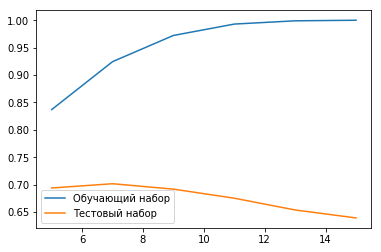

In [1845]:
training_accuracy = []
test_accuracy = []
max_depth_setting = [5,7,9,11,13,15]
for i in max_depth_setting:
    model = GradientBoostingRegressor(random_state=42, max_depth=i)
    model.fit(train_scaler, train_target)
    tmp['N'] = i  
    training_accuracy.append(r2_score(train_target, model.predict(train_scaler)))
    test_accuracy.append(r2_score(valid_target, model.predict(valid_scaler)))
plt.plot(max_depth_setting, training_accuracy, label='Обучающий набор')
plt.plot(max_depth_setting, test_accuracy, label='Тестовый набор')
plt.legend()

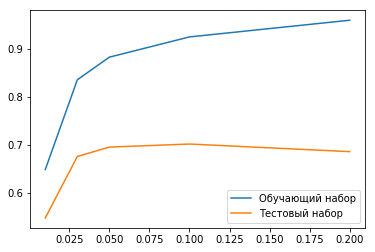

In [1846]:
training_accuracy = []
test_accuracy = []
learning_rate_setting = [0.01,0.03,0.05,0.1,0.2]
for i in learning_rate_setting:
    model = GradientBoostingRegressor(random_state=42, max_depth=7, learning_rate=i)
    model.fit(train_scaler, train_target)
    tmp['N'] = i  
    training_accuracy.append(r2_score(train_target, model.predict(train_scaler)))
    test_accuracy.append(r2_score(valid_target, model.predict(valid_scaler)))
plt.plot(learning_rate_setting, training_accuracy, label='Обучающий набор')
plt.plot(learning_rate_setting, test_accuracy, label='Тестовый набор')
plt.legend()

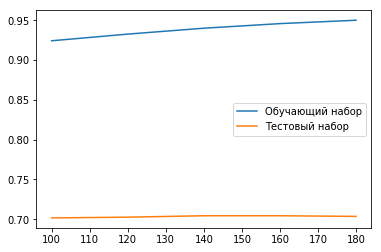

In [1847]:
training_accuracy = []
test_accuracy = []
n_estimators_setting = [100,120,140,160,180]
for i in n_estimators_setting:
    model = GradientBoostingRegressor(random_state=42, max_depth=7, learning_rate=0.1, n_estimators=i)
    model.fit(train_scaler, train_target)
    tmp['N'] = i  
    training_accuracy.append(r2_score(train_target, model.predict(train_scaler)))
    test_accuracy.append(r2_score(valid_target, model.predict(valid_scaler)))
plt.plot(n_estimators_setting, training_accuracy, label='Обучающий набор')
plt.plot(n_estimators_setting, test_accuracy, label='Тестовый набор')
plt.legend()

In [1913]:
model_test = GradientBoostingRegressor(random_state=42, max_depth=7, learning_rate=0.1, n_estimators=150)
model_test.fit(train_scaler, train_target)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [1914]:
r2_score(train_target, model_test.predict(train_scaler))

0.9429663982098881

In [1915]:
r2_score(valid_target, model_test.predict(valid_scaler))

0.7045961250645031

In [1916]:
importances = model_test.feature_importances_
feature_list = list(train.columns)
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)
feature_results

,feature,importance
0,Square,0.410509
1,Social_1,0.178118
2,Rooms,0.081208
3,Social_3,0.066649
4,DistrictId,0.063776
5,Ecology_1,0.059767
6,HouseYear,0.047688
7,Shops_1,0.029600
8,Floor,0.026333
9,HouseFloor,0.026120


In [1952]:
test = pd.read_csv('C:/Geekbrains/test.csv')

In [1953]:
test = remove_unnecessary_columns(test)

In [1954]:
test = pd.get_dummies(test)

In [1955]:
test['Rooms'].describe()

count    5000.000000
mean        1.910000
std         0.838594
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        17.000000
Name: Rooms, dtype: float64

In [1956]:
test.loc[test['Rooms'] > 6, :]

,Id,DistrictId,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
3398,1435,111,17.0,52.866107,15,17.0,1987,0.093443,23,4635,5,2,4,0,1,0,1,0,1


In [1957]:
test.loc[test['Rooms'] == 17, 'Rooms'] = 2

In [1958]:
def prepare_data_test(df):
    df = add_mean_sq(df)
    df = floor_analysis(df)
    return df
test = prepare_data_test(test)

In [1959]:
test.loc[test['Rooms'] == 0, :]

,Id,DistrictId,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,mean_sq_d_r,mean_sq_r,mean_hf_hy
2406,3343,58,0.0,116.824201,3.0,3.0,1977,0.437885,23,5735,3,0,5,0,1,0,1,0,1,43.323833,43.323833,14.0
2524,10729,27,0.0,76.345154,14.0,14.0,1977,0.017647,2,469,0,0,0,0,1,0,1,0,1,41.790881,43.323833,14.0


In [1960]:
test.loc[test['Id'] == 3343, 'Rooms'] = 4
test.loc[test['Id'] == 2524, 'Rooms'] = 3

In [1961]:
test['HouseYear'].describe()

count    5000.000000
mean     1984.392600
std        18.573149
min      1908.000000
25%      1973.000000
50%      1977.000000
75%      2000.000000
max      2020.000000
Name: HouseYear, dtype: float64

In [1962]:
test = test.drop('mean_hf_hy', axis=1)
test = test.drop('Social_2', axis=1)
test = test.drop('mean_sq_r', axis=1)
test = test.drop('mean_sq_d_r', axis=1)
test = test.drop('Ecology_3_B', axis=1)
test = test.drop('Ecology_3_A', axis=1)
test = test.drop('Ecology_2_B', axis=1)
test = test.drop('Ecology_2_A', axis=1)

In [1963]:
test_ID = test['Id']
test = test.drop('Id', axis=1)

In [1964]:
test.columns

Index(['DistrictId', 'Rooms', 'Square', 'Floor', 'HouseFloor', 'HouseYear',
       'Ecology_1', 'Social_1', 'Social_3', 'Helthcare_2', 'Shops_1',
       'Shops_2_A', 'Shops_2_B'],
      dtype='object')

In [1965]:
train.columns

Index(['DistrictId', 'Rooms', 'Square', 'Floor', 'HouseFloor', 'HouseYear',
       'Ecology_1', 'Social_1', 'Social_3', 'Helthcare_2', 'Shops_1',
       'Shops_2_A', 'Shops_2_B'],
      dtype='object')

In [1966]:
valid.columns

Index(['DistrictId', 'Rooms', 'Square', 'Floor', 'HouseFloor', 'HouseYear',
       'Ecology_1', 'Social_1', 'Social_3', 'Helthcare_2', 'Shops_1',
       'Shops_2_A', 'Shops_2_B'],
      dtype='object')

In [1969]:
test.shape

(5000, 13)

In [1970]:
test['Price'] = model_test.predict(test)
test['Id'] = test_ID

In [1983]:
test.head()

,DistrictId,Rooms,Square,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_3,Helthcare_2,Shops_1,Shops_2_A,Shops_2_B,Price,Id
0,58,2.0,49.882643,6.0,14.0,1972,0.310199,11,1,0,0,0,1,207543.103122,725
1,74,2.0,69.263183,1.0,1.0,1977,0.075779,6,3,0,2,0,1,283721.906799,15856
2,190,1.0,41.161634,2.0,5.0,1909,0.000000,30,87,5,5,0,1,276059.320150,5480
3,47,2.0,73.046609,22.0,22.0,2007,0.101872,23,3,3,3,0,1,216863.225667,15664
4,27,1.0,47.527111,17.0,17.0,2017,0.072158,2,1,0,0,1,0,179344.479238,14275


In [1982]:
test.shape

(5000, 15)

In [1985]:
test.loc[:, ['Id', 'Price']].to_csv('MDmitrova_predictions.csv', index=False)